In [2]:
!pip install textblob

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
import csv
import re
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
from collections import Counter


from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import string
import sys
import time

In [2]:
yelp = pd.read_csv('E:/stat628/module3/review.csv')

In [3]:
yelp['re_length'] = yelp['text'].apply(len)

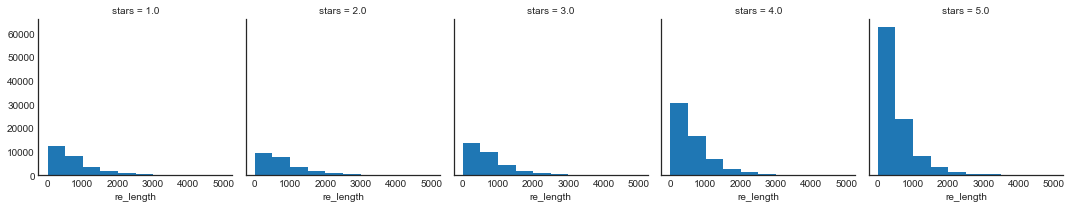

In [4]:
sns.set_style('white')
%matplotlib inline
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'re_length')

In [5]:
yelpbadreviews = yelp[(yelp.stars <= 2 )]
yelpgoodreviews = yelp[(yelp.stars >= 4)]
badreviews = yelpbadreviews.text
goodreviews = yelpgoodreviews.text

In [6]:
badreviews = badreviews.sample(frac = .001, replace = True )
goodreviews = goodreviews.sample(frac= .001, replace = True)

In [9]:
import collections

import re

import sys

import time





def tokenize(string):

    """Convert string to lowercase and split into words (ignoring

    punctuation), returning list of words.

    """

    return re.findall(r'\w+', string.lower())





def count_ngrams(lines, min_length=2, max_length=4):

    """Iterate through given lines iterator (file object or list of

    lines) and return n-gram frequencies. The return value is a dict

    mapping the length of the n-gram to a collections.Counter

    object of n-gram tuple and number of times that n-gram occurred.

    Returned dict includes n-grams of length min_length to max_length.

    """

    lengths = range(min_length, max_length + 1)

    ngrams = {length: collections.Counter() for length in lengths}

    queue = collections.deque(maxlen=max_length)



    # Helper function to add n-grams at start of current queue to dict

    def add_queue():

        current = tuple(queue)

        for length in lengths:

            if len(current) >= length:

                ngrams[length][current[:length]] += 1



    # Loop through all lines and words and add n-grams to dict

    for line in lines:

        for word in tokenize(line):

            queue.append(word)

            if len(queue) >= max_length:

                add_queue()



    # Make sure we get the n-grams at the tail end of the queue

    while len(queue) > min_length:

        queue.popleft()

        add_queue()



    return ngrams





def print_most_frequent(ngrams, num=10):
    """Print num most common n-grams of each length in n-grams dict."""
    for n in sorted(ngrams):
        print('----- {} most common {}-word phrase -----'.format(num, n))
        for gram, count in ngrams[n].most_common(num):
            print('{0}: {1}'.format(' '.join(gram), count))
        print('')
def print_word_cloud(ngrams, num=5):
    """Print word cloud image plot """
    words = []
    for n in sorted(ngrams):
        for gram, count in ngrams[n].most_common(num):
            s = ' '.join(gram)
            words.append(s)
            
    cloud = WordCloud(width=1440, height= 1080,max_words= 200).generate(' '.join(words))
    plt.figure(figsize=(20, 15))
    plt.imshow(cloud)
    plt.axis('off');
    plt.show()
    print('')

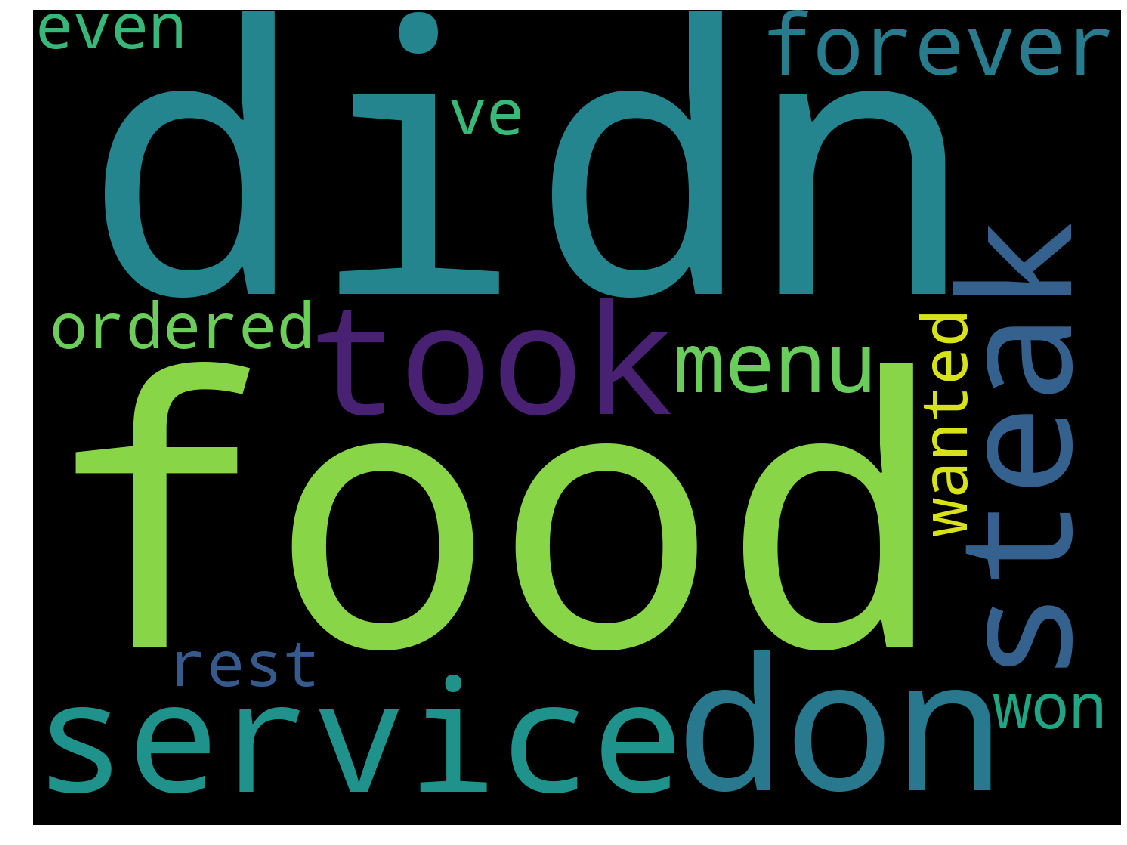

In [12]:
most_frequent_badreviews = count_ngrams(badreviews,max_length=3)
print_word_cloud(most_frequent_badreviews, 20)

In [11]:
print_most_frequent(most_frequent_badreviews, num= 10)

----- 10 most common 2-word phrase -----
it was: 25
we were: 22
and the: 20
of the: 19
on the: 19
the food: 17
didn t: 17
don t: 16
to get: 15
to be: 15

----- 10 most common 3-word phrase -----
i don t: 6
i didn t: 6
we had to: 5
and the food: 5
i ordered the: 5
the rest of: 4
it took forever: 4
the food was: 4
all of the: 4
on the menu: 4



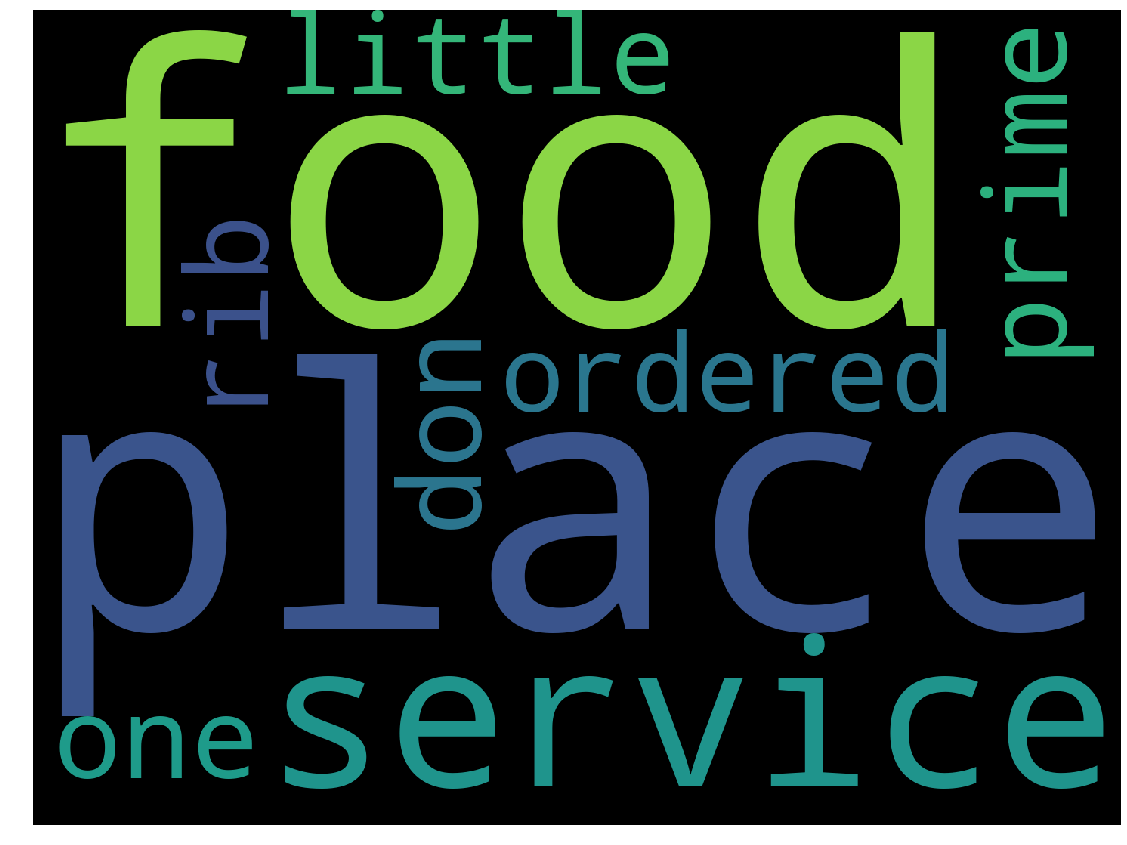

In [13]:
most_frequent_goodreviews = count_ngrams(goodreviews,max_length=3)
print_word_cloud(most_frequent_goodreviews, 10)

In [16]:
print_most_frequent(most_frequent_goodreviews, num= 30)

----- 30 most common 2-word phrase -----
of the: 76
it was: 73
and the: 68
the food: 48
this place: 45
to the: 43
in the: 41
on the: 41
it s: 38
i had: 38
and i: 37
had the: 37
for a: 36
was a: 36
we were: 35
had a: 34
service was: 33
for the: 33
the service: 31
i ve: 30
is a: 28
with a: 28
food was: 28
the best: 27
a little: 27
i m: 27
i was: 27
to be: 26
one of: 26
with the: 25

----- 30 most common 3-word phrase -----
i had the: 19
the food was: 18
the service was: 15
this place is: 12
one of the: 12
and it was: 11
the prime rib: 11
i don t: 11
was a little: 10
i ordered the: 10
it was a: 10
of the best: 9
the food is: 9
the old fashioned: 8
mac and cheese: 8
i ve ever: 8
a lot of: 8
i can t: 8
it s a: 7
service was good: 7
ve ever had: 7
this is a: 7
this is the: 7
service was great: 7
i ve had: 7
and the service: 7
was very good: 7
cooked to perfection: 7
i have been: 6
a few times: 6

